# Combine multiple protein and peptide annotations to create a single annotation for Cytoscape - July 14, 2017

Use the TPS input and output.

## Set up file locations

In [1]:
% pylab inline

import os
import util
import pandas as pd

baseDir = os.path.join('..','..')
tps_in_dir = os.path.join(baseDir, 'Notebooks', 'ApplyThresholds')
tps_out_dir = os.path.join(baseDir, 'Results', 'TPS output', 'TPS_06-30-2017')

# Use the version with the header line
pepMapFile = os.path.join(tps_in_dir, 'peptideMapHeader.tsv')
pepFirstFile = os.path.join(tps_in_dir, 'firstScores.tsv')
pepPrevFile = os.path.join(tps_in_dir, 'prevScores.tsv')
timeSeriesFile = os.path.join(tps_in_dir, 'timeSeries.tsv')

windowsFile = os.path.join(tps_out_dir, 'activity-windows.tsv')
networkFile = os.path.join(tps_out_dir, 'output.sif')

# Use the Kitano 2016 pathway as the gold standard
goldStandardFile = os.path.join(baseDir, 'data', 'evaluation', 'Kitano2016_ORFs.txt')

styleTemplateFile = 'tps_style_template.xml'

out_dir = 'kanshin_071417'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
outFile = os.path.join(out_dir, 'kanshin2015-cytoscape-annotations.txt')
outStyleFile = os.path.join(out_dir, 'tps_style.xml')

Populating the interactive namespace from numpy and matplotlib


## Call the function to load the temporal data and gold standard annotations and merge them into a Cytoscape-readable format

In [2]:
pvalThresh = 0.01 # Same threhsold used in TPS but it doesn't matter with binary "p-values"
logTransform = False
pepsPerProt = util.PrepTemporalCytoscapeTPS(pepMapFile, timeSeriesFile, pepFirstFile,
                             pepPrevFile, windowsFile, networkFile,
                             goldStandardFile, pvalThresh, logTransform, styleTemplateFile,
                             outFile, outStyleFile, logDefault=-1.0, addZero=True, repairMissing=True)

Loaded protein id map for 4337 peptides
Loaded 4337 peptides and 12 scores in the first and previous score files
Loaded prizes for 4337 peptides
1401 peptides with significant prizes (>= 2)
Loaded time series for 1596 proteins (and pseudonodes)
Added 0 to the start of every time series
Min value in time series: -10.051863
Max value in time series: 5.686276
Mean peptides per protein: 2.717419
Max peptides per protein: 27
Max significant peptides per protein: 11
Max insignificant peptides per protein: 20
Loaded activity windows for 250 proteins
Loaded 151 gold standard reference pathway proteins
Loaded 62 proteins on the synthesized pathway
Wrote attributes for 2 Steiner nodes in the TPS pathway
Wrote attributes for 52 prize nodes in the TPS pathway with a significant peptide
Wrote attributes for 8 prize nodes in the TPS pathway with no significant peptides
Wrote attributes for 1540 proteins excluded by PCSF or TPS


## Plot the number of peptides per protein

693 proteins with 1 peptide(s)
355 proteins with 2 peptide(s)
190 proteins with 3 peptide(s)
124 proteins with 4 peptide(s)
63 proteins with 5 peptide(s)
38 proteins with 6 peptide(s)
37 proteins with 7 peptide(s)
30 proteins with 8 peptide(s)
15 proteins with 9 peptide(s)
10 proteins with 10 peptide(s)
11 proteins with 11 peptide(s)
8 proteins with 12 peptide(s)
2 proteins with 13 peptide(s)
5 proteins with 14 peptide(s)
6 proteins with 15 peptide(s)
1 proteins with 16 peptide(s)
0 proteins with 17 peptide(s)
2 proteins with 18 peptide(s)
1 proteins with 19 peptide(s)
1 proteins with 20 peptide(s)
0 proteins with 21 peptide(s)
1 proteins with 22 peptide(s)
1 proteins with 23 peptide(s)
0 proteins with 24 peptide(s)
1 proteins with 25 peptide(s)
0 proteins with 26 peptide(s)
1 proteins with 27 peptide(s)


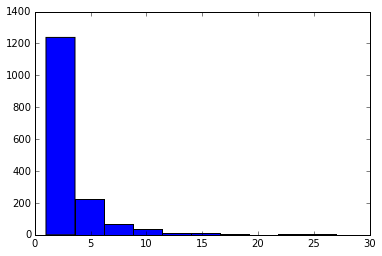

In [3]:
hist(pepsPerProt)
for count in range(1,max(pepsPerProt)+1):
    print "%d proteins with %d peptide(s)" % (sum([x == count for x in pepsPerProt]), count)

## Test parts of the Cytoscape table

In [4]:
cytoDf = pd.read_csv(outFile, sep='\t')
cytoDf.head()

,Protein,NodeType,ReferencePathway,SigPeptide1,SigPeptide2,SigPeptide3,SigPeptide4,SigPeptide5,SigPeptide6,SigPeptide7,...,HeatMapBg2,HeatMapBg3,HeatMapBg4,HeatMapBg5,HeatMapBg6,HeatMapBg7,HeatMapBg8,HeatMapBg9,HeatMapBg10,HeatMapBg11
0,YAL001C,Excluded,False,"0, 0.148088082645, 0.0120680233091, 0.06225989...",NaN,NaN,NaN,NaN,NaN,NaN,...,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0"
1,YAL003W,Excluded,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0"
2,YAL005C,Excluded,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0"
3,YAL011W,Excluded,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0"
4,YAL013W,Excluded,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0"


In [5]:
# Verify that all TPS nodes are in the annotation file
tpsNodes = set()
with open(networkFile) as net_f:
    for line in net_f:
        parts = line.strip().split('\t')
        tpsNodes.add(parts[0])
        tpsNodes.add(parts[2])

# Some nodes have activity windows but are not in the output TPS network
activityWindowNodes = set()
with open(windowsFile) as windows_f:
    windows_f.readline()
    for line in windows_f:
        parts = line.strip().split('\t')
        activityWindowNodes.add(parts[0].split('#')[0])

subsetDf = cytoDf[cytoDf['NodeType'] != 'Excluded']
subsetNodes = set(subsetDf['Protein'].values)
assert tpsNodes == subsetNodes
print 'All TPS nodes are in the annotation file'

# Verify all proteins that have peptides listed in the annotation file
# are in the peptide-protein mapping
prizeNodes = set()
with open(pepMapFile) as prize_f:
    # Skip the header
    prize_f.next()
    for line in prize_f:
        parts = line.strip().split('\t')
        prizeNodes.add(parts[1])
# All proteins in the annotation file with a significant or insignificant peptide
subsetNodes = set(cytoDf.loc[cytoDf['SigPeptide1'].notnull() | cytoDf['InsigPeptide1'].notnull(), 'Protein'].values)
assert len(subsetNodes) == 1596
assert subsetNodes.issubset(prizeNodes)
print 'All annotation file proteins are in the peptide mapping file'

# Verify all nodes in the annotation file are from the TPS network or the prize nodes
allNodes = set()
allNodes.update(tpsNodes)
allNodes.update(prizeNodes)
allNodes.update(activityWindowNodes)
subsetNodes = set(cytoDf['Protein'].values)
assert subsetNodes.issubset(allNodes)
print 'All nodes in the annotation file are from TPS or the prize nodes'

# Verify the reference pathway overlap matches what was observed manually
assert len(cytoDf[cytoDf['ReferencePathway'] & (cytoDf['NodeType'] != 'Excluded')]) == 17
print 'All nodes in the TPS pathway and Kitano reference pathway are in the annotation file'

# Verify first activity times
# HOG1
# explore why this is not T05 - it was due to missing data at that time point that had been imputed
assert cytoDf.loc[cytoDf['Protein'] == 'YLR113W', 'FirstActive'].values == 'T10'
# ENT4
# explore why this is not T45 - it was due to missing data at that time point that had been imputed
assert cytoDf.loc[cytoDf['Protein'] == 'YLL038C', 'FirstActive'].values == 'T45'
assert len(cytoDf[cytoDf['FirstActive'] == 'T05']) == 8
assert len(cytoDf[cytoDf['FirstActive'] == 'T60']) == 1
assert len(cytoDf[cytoDf['FirstActive'] == 'Not active']) == 1540
print 'Nodes in annotation file have expected first activity time'

# Verify all excluded nodes have no first activity time
assert np.all((cytoDf['NodeType'] == 'Excluded') == (cytoDf['FirstActive'] == 'Not active'))
print 'All excluded nodes have no activity time and vice versa'

# Verify that these proteins have the expected number of significant and insignificant peptides
# PTK2
assert sum(cytoDf.loc[cytoDf['Protein'] == 'YJR059W', 'SigPeptide1':'SigPeptide11'].notnull().values) == 4
assert sum(cytoDf.loc[cytoDf['Protein'] == 'YJR059W', 'InsigPeptide1':'InsigPeptide20'].notnull().values) == 5

# SEC16
assert sum(cytoDf.loc[cytoDf['Protein'] == 'YPL085W', 'SigPeptide1':'SigPeptide11'].notnull().values) == 7
assert sum(cytoDf.loc[cytoDf['Protein'] == 'YPL085W', 'InsigPeptide1':'InsigPeptide20'].notnull().values) == 20

# BOI1
assert sum(cytoDf.loc[cytoDf['Protein'] == 'YBL085W', 'SigPeptide1':'SigPeptide11'].notnull().values) == 11
assert sum(cytoDf.loc[cytoDf['Protein'] == 'YBL085W', 'InsigPeptide1':'InsigPeptide20'].notnull().values) == 14
print 'Proteins have expected number of peptides'

def MinLogFC(row):
    fcs = []
    for timeSeries in row:
        if not str(timeSeries) == 'nan':
            fcs.extend(map(float, timeSeries.split(', ')))
    return min(fcs)

# Verify min fold changes
# ALR1
assert np.isclose(MinLogFC(cytoDf.loc[cytoDf['Protein'] == 'YOL130W', 'SigPeptide1':'InsigPeptide20'].values[0]),-1.046921)
# MNR2
assert np.isclose(MinLogFC(cytoDf.loc[cytoDf['Protein'] == 'YKL064W', 'SigPeptide1':'InsigPeptide20'].values[0]),-2.900018)
print 'Proteins have expected min log2 fold change'

def TimeSeriesStringClose(loaded, reference):
    return np.isclose(map(float, loaded.split(', ')), map(float, reference.split(', '))).all()

# Verify missing data was filled in properly
# ACE2
assert TimeSeriesStringClose(cytoDf.loc[cytoDf['Protein'] == 'YLR131C', 'SigPeptide1'].values[0], '0, 0, 0.10540989404, ' +
                             '-0.137901762541, -0.111788637486, 0.0366088286051, ' +
                             '-0.0109482110892, 0.115699153432, -0.0345001274169, 0.241352085771, ' + 
                             '0.37105696835, -0.239157391252, -0.239157391252, -0.00481219123882')
# MNR2
assert TimeSeriesStringClose(cytoDf.loc[cytoDf['Protein'] == 'YKL064W', 'SigPeptide4'].values[0], '0, -0.0903420856896, -0.19111251351754832, ' +
                            '-0.43336991241236394, -0.19280996679804013, -0.19280996679804013, -0.19280996679804013, ' +
                            '-0.2668713015184272, -0.17524029194697266, -0.7408420290718333, -0.7408420290718333, ' +
                            '-0.6045203602393003, -0.5949443350845379, -0.6344866211567608')
print 'Missing data was filled in as expected'
    
with open(outStyleFile) as f:
    styleContent = f.read()
    assert '$$$' not in styleContent
print 'Removed placeholders from style file'

All TPS nodes are in the annotation file
All annotation file proteins are in the peptide mapping file
All nodes in the annotation file are from TPS or the prize nodes
All nodes in the TPS pathway and Kitano reference pathway are in the annotation file
Nodes in annotation file have expected first activity time
All excluded nodes have no activity time and vice versa
Proteins have expected number of peptides
Proteins have expected min log2 fold change
Missing data was filled in as expected
Removed placeholders from style file


## Test the RepairMissingData function

In [6]:
timeSeriesList = [['1', '2', '3', '4'], ['', '2', '3', '4'], ['1', '2', '', '4'], ['1', '2', '3', '']]

for timeSeries in timeSeriesList:
    print "Original: {}".format(timeSeries)
    print "Repaired: {}".format(util.RepairMissingData(timeSeries, '0'))
    print

Original: ['1', '2', '3', '4']
Repaired: ['1', '2', '3', '4']

Original: ['', '2', '3', '4']
Repaired: ['0', '2', '3', '4']

Original: ['1', '2', '', '4']
Repaired: ['1', '2', '2', '4']

Original: ['1', '2', '3', '']
Repaired: ['1', '2', '3', '3']

